In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import ray
ray.shutdown()

In [4]:
import numpy as np 
import pandas as pd
from methods import Scattering, baseline
import preprocessing_pipeline as pp
from sklearn.pipeline import Pipeline

<AxesSubplot:>

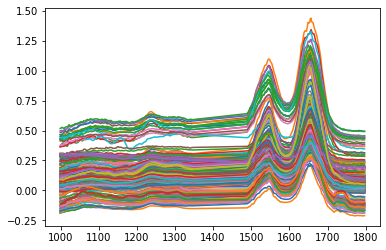

In [5]:
X = pd.read_pickle("data.pkl")
test_X = X.sample(n = 1000)
test_X.T.plot(legend = False)

In [6]:
from skopt import BayesSearchCV as BSC
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import ParameterGrid
paramList={
            'binning'   : [['doNothing',{}],
                            ['MeanBin', {'factor':Integer(2,8)}]
                            ],
            'smoothing' : [['doNothing',{}],
                            ['savgol',{'window':Categorical([5, 7, 9, 11]), 'polyorder': Integer(2,4)}],
                            ['PCA',{'n_components': Real(0.8, 0.95)}]
                            ],
            'normalise' :  [['vector',{}],
                            ['min_max',{}], 
                            ['feature',{}]
                            ],
            'baseline': [['doNothing',{}], 
                        ['sg_diff',{'window': Categorical([5, 7, 9, 11]), 'polyorder': Integer(2,4), 'order': Integer(1,2)}],
                        ['rubberband',{}]
                        ],
           'FeaExtraction': [['doNothing',{}],
                                ['PCA',{'n_components':Real(0.8,0.95)}],
                                ],
            'Classifier': [['LogisticRegression',{}],
                            ['Random Forest',{}],
                            ['Naive Bayes',{}]
                            ]}
params = ParameterGrid(paramList)
order = ['binning', 'smoothing', 'normalise','baseline','FeaExtraction', 'Classifier']


In [7]:
from preprocessing_pipeline import BayesOptimiser
from sklearn import model_selection
rand_address = np.random.randint(0, 323, 30)
split_ob = model_selection.KFold(n_splits = 5, random_state=3)

In [1]:
bayes_ob = []
for i,j in enumerate(rand_address):
    print('test {}'.format(i+1))
    temp = BayesOptimiser(params[j])
    temp.BayesSearch(X,X.index.get_level_values('outcome'), n_iter = 10, random_state = 2)
    bayes_ob.append(temp)


NameError: name 'rand_address' is not defined

In [87]:
params

In [85]:
temp.address

OrderedDict([('binning', ['doNothing', {}]),
             ('smoothing',
              ['savgol',
               {'window': Categorical(categories=(5, 7, 9, 11), prior=None),
                'polyorder': Integer(low=2, high=4, prior='uniform', transform='identity')}]),
             ('normalise', ['feature', {}]),
             ('baseline',
              ['sg_diff',
               {'window': Categorical(categories=(5, 7, 9, 11), prior=None),
                'polyorder': Integer(low=2, high=4, prior='uniform', transform='identity'),
                'order': Integer(low=1, high=2, prior='uniform', transform='identity')}]),
             ('FeaExtraction', ['doNothing', {}]),
             ('Classifier', ['LogisticRegression', {}])])

In [52]:
bayes.params

{'binning__factor': Integer(low=2, high=8, prior='uniform', transform='identity'),
 'baseline__window': Categorical(categories=(5, 7, 9, 11), prior=None),
 'baseline__polyorder': Integer(low=2, high=4, prior='uniform', transform='identity'),
 'baseline__order': Integer(low=1, high=2, prior='uniform', transform='identity')}

In [56]:
bayes.BayesSearch(test_X, test_X.index.get_level_values('outcome'))

OrderedDict([('baseline__order', 1), ('baseline__polyorder', 2), ('baseline__window', 9), ('binning__factor', 5)])
0.661


<AxesSubplot:>

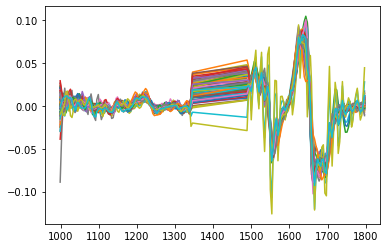

In [32]:
X_transform.T.plot(legend = False)

In [22]:
bayes.BayesSearch(test_X, test_X.index.get_level_values('outcome'))

ValueError: array must not contain infs or NaNs

In [13]:
temp.pipeline.fit(test_X, test_X.index.get_level_values('outcome'))

Pipeline(steps=[('binning', IdentityTransformer()),
                ('smoothing', PCA_smooth(n_components=None)),
                ('normalise', feature()), ('baseline', IdentityTransformer()),
                ('FeaExtraction', PCA()), ['Classifier', GaussianNB()]])

In [15]:
temp.pipeline.predict()

Pipeline(steps=[('binning', IdentityTransformer()),
                ('smoothing', PCA_smooth(n_components=None)),
                ('normalise', feature()), ('baseline', IdentityTransformer()),
                ('FeaExtraction', PCA()), ['Classifier', GaussianNB()]])

In [92]:
paramList={
            'binning'   : [['doNothing',{}],
                            ['MeanBin', ]
                            ],
            'smoothing' : [['doNothing',{}],
                            ['savgol',{}],
                            ['PCA',{}]
                            ],
            'normalise' :  [['vector',{}],
                            ['min_max',{}]
                            ],
            'baseline': [['doNothing',{}], 
                        ['sg_diff',{}],
                        ['rubberband',{}]
                        ],
           'FeaExtraction': [['doNothing',{}],
                                ['PCA',{}],
                                ['LDA',{}]
                                ],
            'Classifier': [['LogisticRegression',{}],
                            ['Random Forest',{}],
                            ['Naive Bayes',{}]
                            ]}

In [14]:
bayes.BayesParameters()

In [16]:
bayes.pipeline

Pipeline(steps=[['binning', SpectralBinning()],
                ['smoothing', IdentityTransformer()], ['normalise', min_max()],
                ['baseline', sg_diff()],
                ['FeaExtraction', IdentityTransformer()],
                ['Classifier', LogisticRegression()]])